In [1]:
import random
import numpy as np
import warnings

import dataset
import taylor_spline

random.seed(0)
np.random.seed(0)
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

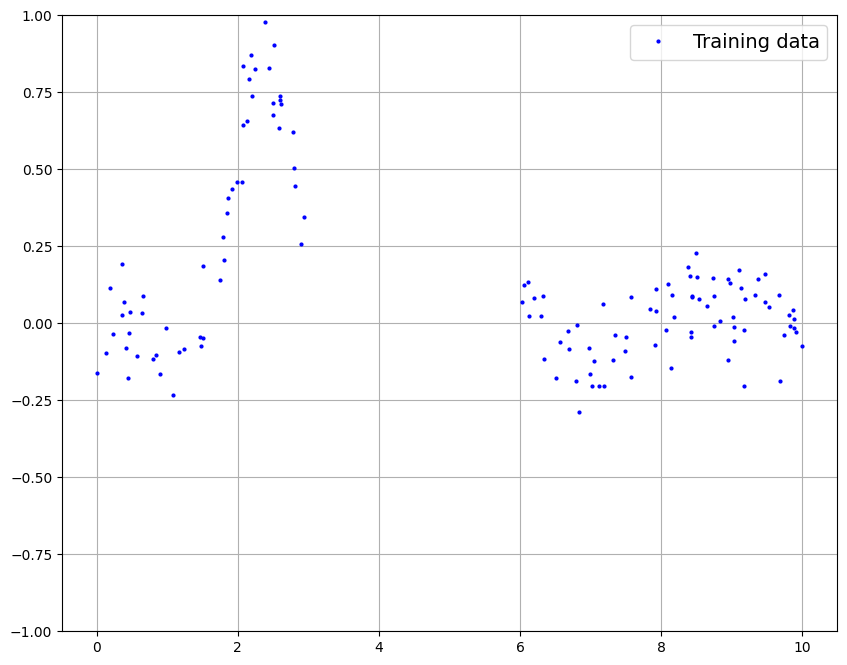

In [2]:
S = dataset.HEADataset()# dataset.MagmanDatasetScaled()
S.sample(size=200, noise=0.08)#05)
S.erase(3, 6)
#S.load('data/magman.csv')
S.plot()

In [3]:
"""tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)
tspl.fit(S)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()"""

'tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)\ntspl.fit(S)\n\nprint(f"Fitness: {tspl.fitness(S)}")\nS.plot()\ntspl.plot()'

'\n@widgets.interact(x0=(.0, 10.0, 0.01), deg=(0, 10, 1), exp_cov=(0.01, 0.5, 0.01))\ndef update(x0=0., deg=4, exp_cov=0.2):\n    global prev_drawings\n\n    tspline_fitter = taylor_spline.TaylorSplineEstimator()\n    tspline = tspline_fitter.fit(S, deg, silent=True, x0=x0, exp_cov=exp_cov)\n\n    for d in prev_drawings: d.remove()\n    prev_drawings = []\n    \n    print(f"Fitness: {tspline.fitness(S)}")\n    prev_drawings += tspline.plot(show=False)\n'

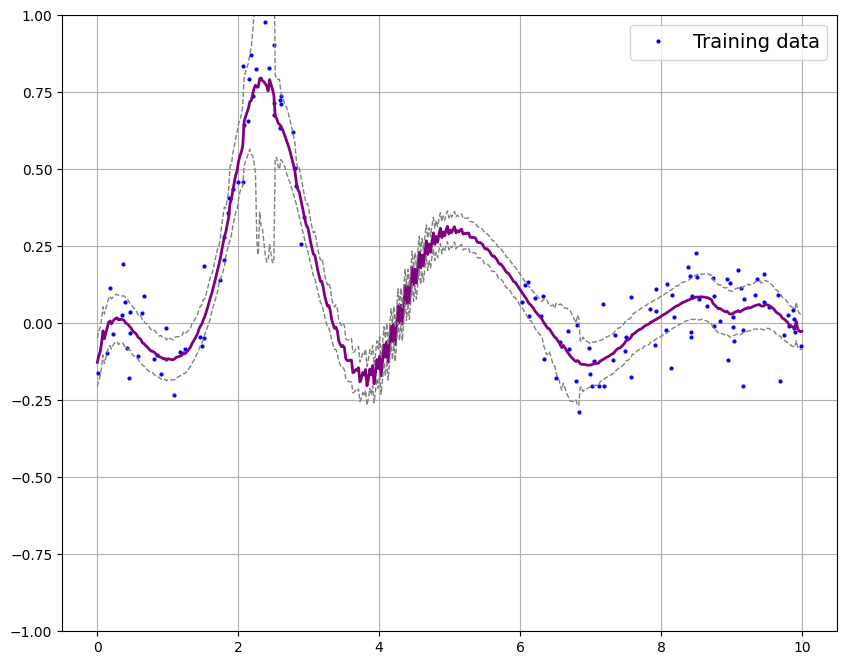

In [10]:
#%matplotlib widget
#import ipywidgets as widgets

prev_drawings = []
S.plot()

def func(x):
    y = []
    y_lb = []
    y_ub = []
    for __x in x:
        tspline_est = taylor_spline.TaylorSplineEstimator()
        tspline = tspline_est.fit(S, 2, silent=True, x0=__x, exp_cov=0.3)
        lb, ub = tspline_est.get_bounds(S, tspline)

        y.append(tspline.y(__x))
        y_lb.append(lb)
        y_ub.append(ub)

    return y, y_lb, y_ub

x = np.linspace(S.xl, S.xu, 500)
y, lb, ub = func(x)
plt.plot(x, y, linestyle='solid', linewidth=2, color='purple', label='Model')
plt.plot(x, lb, linestyle='dashed', linewidth=1, color='gray', label='Lower Bound')
plt.plot(x, ub, linestyle='dashed', linewidth=1, color='gray', label='Upper Bound')

"""
@widgets.interact(x0=(.0, 10.0, 0.01), deg=(0, 10, 1), exp_cov=(0.01, 0.5, 0.01))
def update(x0=0., deg=4, exp_cov=0.2):
    global prev_drawings

    tspline_fitter = taylor_spline.TaylorSplineEstimator()
    tspline = tspline_fitter.fit(S, deg, silent=True, x0=x0, exp_cov=exp_cov)

    for d in prev_drawings: d.remove()
    prev_drawings = []
    
    print(f"Fitness: {tspline.fitness(S)}")
    prev_drawings += tspline.plot(show=False)
"""